In [2]:
%load_ext autoreload
%autoreload 2
import torch
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from time import time
from tqdm import tqdm
from collections import defaultdict
from math import ceil
import seaborn as sns
from approxmh.utilities import *
from approxmh.vae import VAE, VAETrainer, get_filename
from approxmh.samplers import *
from approxmh.distributions import Banana, Funnel, create_gaussian_lattice, create_random_gaussian_mixture, get_mode_coverage
from approxmh.distribution_metrics import *
from approxmh.rnvp import RNVP
from approxmh.flow_trainer import FlowTrainer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
device: cuda


In [4]:
D=128
a=3
target = Funnel(dim=D, device=device, a=a)
target_name = f'funnel_{D}d_a{a}'

In [5]:
hidden_dims = (128, 128, 128)
model = VAE(
    data_dim=D,
    hidden_dims=hidden_dims,
    latent_dim=D,
    device=device
)
model_filename = f'models/{target_name}_hdim{hidden_dims}_vae'

In [20]:
N = 5000

In [21]:
%%timeit

model_samples = model.sample((N,))

1.81 ms ± 9.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
model_samples = model.sample((N,))

In [23]:
%%timeit

acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, model.log_prob, n_estimates=1)

2.12 s ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Removed max_rejections

In [26]:
%%timeit

acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, model.log_prob, n_estimates=1)

2.04 s ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# improved n_accepted counting

In [30]:
%%timeit

acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, model.log_prob, n_estimates=1)

2.02 s ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
%%timeit

acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, model.log_prob, n_estimates=2, max_density_ratio=6)

MH discarded 295 outlier(s)
MH discarded 286 outlier(s)
MH discarded 316 outlier(s)
MH discarded 298 outlier(s)
MH discarded 287 outlier(s)
MH discarded 307 outlier(s)
MH discarded 284 outlier(s)
MH discarded 274 outlier(s)
2.43 s ± 8.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


MH discarded 21 outlier(s)


(1e-20, 10000000000.0)

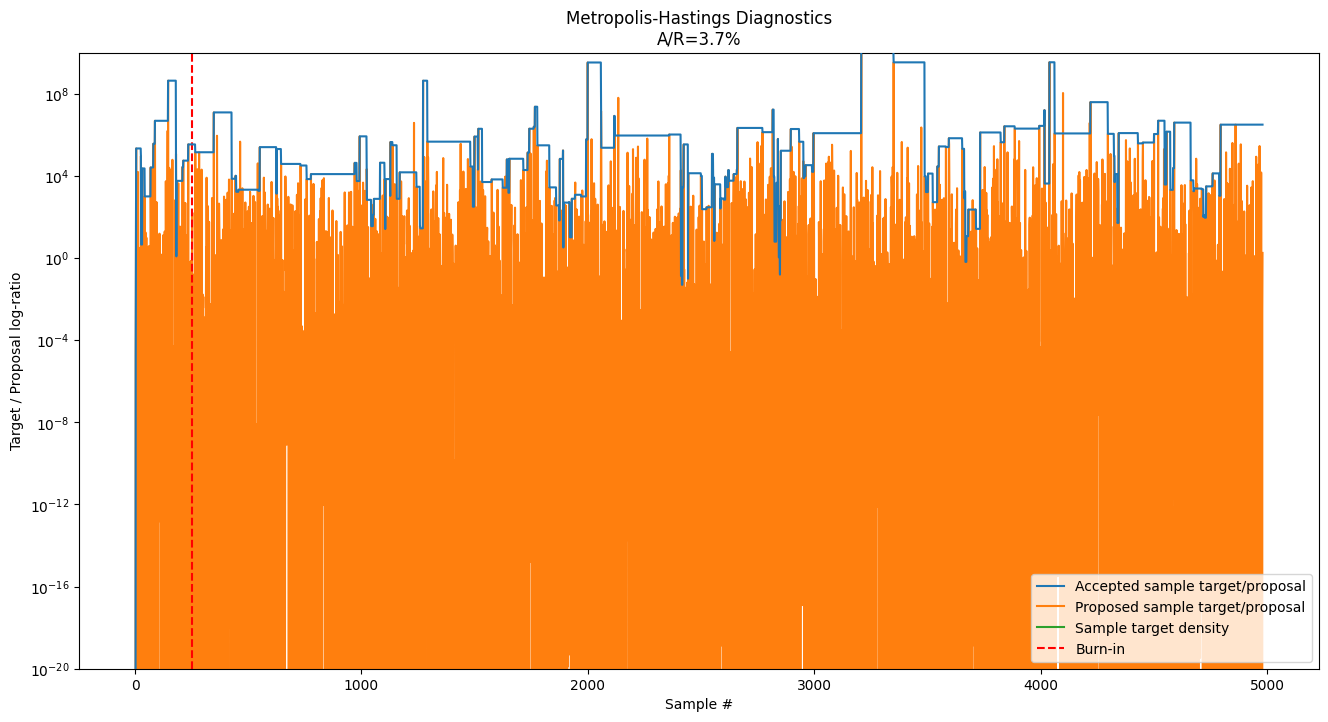

In [69]:
acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, model.log_prob, n_estimates=2, visualize=True, max_density_ratio=15)
plt.gca().set_ylim(1e-20, 1e10)